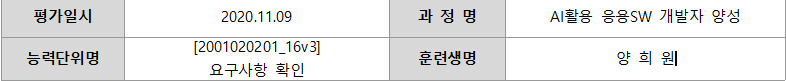

In [65]:
from IPython.display import Image
Image("ch04표지.png")

### 정적 사이트 (Server rendering)

- html data를 가지고 온다
- 받아온 데이터에서 적절한 값을 추출하는 과정 ==>parsing
- blog 검색결과
- HTML Tag : ol#reallink>div>(li.up>a[href="#"]{실시간 검색어$$})*5
- HTML 구조를 계층적으로 표현하는 DOM(Document Object Model) 형태이다
- html>body>div>ul>li.....
- html 파일 불러오기 => requests.get(URL)
- 데이터 파싱 => BeautifulSoup([html 데이터],"html.parser") => bs.select([selector])

### 동적 사이트 (Client rendering)

- 어디에선가 (_________ => API) 찾는 과정
- 데이터를 불러오고
- 데이터를 추출한다 =>parsing


### Daum 블로그 => 검색어 : 파이썬

In [57]:
import requests
from bs4 import BeautifulSoup

response = requests.get("http://search.daum.net/search?w=blog&f=section&m=&SA=daumsec&lpp=10&nil_profile=vsearch&nil_src=blog&q=%ED%8C%8C%EC%9D%B4%EC%8D%AC")
dom = BeautifulSoup(response.text,"html.parser")
# dom
post_elements = dom.select("div.coll_cont > ul.list_info > li")
# post_elements

for post_element in post_elements:
    title_element = post_element.select_one("div.wrap_tit > a")
    title = title_element.text
    url = title_element.attrs.get("href")
    print(title)
    print(url)

세종사이버대 컴퓨터AI공학과
https://keyword.ad.daum.net/short/clk?q=FJwV5ZPZxEv-cmat--BfGc-VFgVY_ywEZDeXqr8UuFq9RLGpcSrZ.Puw_nbz77WAHOUk2kMxi.7-HJ6MWvV-4_y28xj6t6DEeGhK9t_SzLuQrl5UIwU8XBlFMVwp-dX-8RmIxJ4lIi.Qv47rPKU5eyAKz_fg9C2xK_GIgisfcffjW.3M_hPMc5gvDjfrfE4Qzw43mBioliIdu8a4c5eTxA_QktZEeOH1raEiKzskY2cFnvRn66c4Ihl.WwLdL-RCHhe2xMiaxWUP2HmztkIR5HYzDTcpWwJNjAmftzH3kaTWTd51Q6zp6fg3N4kkHi7QJN3UB9iU9pOh7ndeAUrNYI8wA1TN8iy5fVtUxoCj.we9QHnbYs--iKvqMn468UPWIkQ0&s=https%3A%2F%2Fhome.sjcu.ac.kr%2Fko%2Fcms%2FFR_CON%2Findex.do%3FMENU_ID%3D2470%26utm_source%3DSA%26utm_medium%3DDAUM_PC%26utm_campaign%3DSPRING1%26utm_content%3DKEYWORD%26utm_term%3D%ED%8C%8C%EC%9D%B4%EC%8D%AC%26DMKW%3D%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC%26DMSKW%3D%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC%26DMCOL%3DPM
가비아 파이썬 호스팅 오픈
https://keyword.ad.daum.net/short/clk?q=FKiUTkWDH-g8dB5iyg3S39Gp6-WgUfZ6-zdcgMt4PFPEMcpH7Xw7YOGdpFOz.7xw_xoRkOv1QB1UP8UEp7t.YgGDArWJzg27C2TLffvBT8PCZWPFgPy5ZbQ5TqVTu8tMIiDJLka..r.y3C1TinV4-95U13B-2VdWcsvMZ

### 관련 검색어 텍스트 추출

In [16]:
[
    releated_keyword_element.text
    for releated_keyword_element
    in dom.select(".wsn")
]


['파이썬 강좌',
 '파이썬 프로그래밍',
 '파이썬 책',
 '파이썬 뱀',
 '파이썬 다운로드',
 '파이썬 예제',
 '파이썬 맵',
 '파이썬 아나콘다',
 '파이썬 설치',
 '파이썬 자격증',
 '파이썬 활용',
 '파일썬',
 'python',
 '파이썬 학원',
 '파이썬 코딩',
 '파이썬 기초',
 '파이썬 강의',
 '파이썬 R',
 '파이썬 교재',
 '파이썬 주식',
 '파이썬 강좌',
 '파이썬 프로그래밍',
 '파이썬 책',
 '파이썬 뱀',
 '파이썬 다운로드',
 '파이썬 예제',
 '파이썬 맵',
 '파이썬 아나콘다',
 '파이썬 설치',
 '파이썬 자격증',
 '파이썬 활용',
 '파일썬',
 'python',
 '파이썬 학원',
 '파이썬 코딩',
 '파이썬 기초',
 '파이썬 강의',
 '파이썬 R',
 '파이썬 교재',
 '파이썬 주식']

#### 동적 사이트 : yogiyo.co.kr

- 서구 계룡로 636
- 음식점 리스트 크롤링
- 새로고침하면 빙글빙글... 돌면서 서버로부터 데이터를 불러오는 동적 사이트이다.
- 개발자 도구 > 네트워크 탭 > 새로고침 > ?item=60&lat= ~~~~~~ 주소는 
- https://www.yogiyo.co.kr/api/v1/restaurants-geo/?items=60&lat=36.3385369684327&lng=127.392457108024&order=rank&page=0&search=

In [27]:
url = "https://www.yogiyo.co.kr/api/v1/restaurants-geo/?items=60&lat=36.3385369684327&lng=127.392457108024&order=rank&page=0&search="
headers = {
    "x-apikey": "iphoneap",
    "x-apisecret": "fe5183cc3dea12bd0ce299cf110a75a2"
}

response = requests.get(url,headers = headers)
yogiyo = response.json()
# yogiyo


In [29]:
[
    restaurant.get("name")
    for restaurant
    in yogiyo.get("restaurants")
]

['피자마켓-대전서구점',
 '묵은지김치찌개전문점',
 '맘스터치-서대전점',
 '네네치킨-탄방점',
 'BBQ-대전탄방행운점',
 '코리엔탈깻잎두마리치킨-둔산점',
 '파파존스-대전둔산점',
 '피자헛-대전탄방점',
 '네오피자-대전서구점',
 '버거킹-대전용문역점',
 '빅스타피자-대전탄방점',
 '쫄면주는삼겹본능-대전갈마점',
 '멕시카나-롯데괴정점',
 '도미노피자-대전용문점',
 '또래오래-대전갈마점',
 '파리바게뜨-대전괴정점',
 '피자알볼로-둔산점',
 '아웃백-둔산점',
 '공차-대전용문점',
 '미스터피자-서대전점',
 '배달삼겹돼지되지-대전1호점',
 '놀부부대찌개-대전둔산법원점',
 '흥부찜닭-대전갈마점',
 '뽕뜨락피자-태평2점',
 '큰맘할매순대국-둔산점',
 '세븐일레븐-대전용문무지개점',
 '놀부보쌈-대전둔산법원점',
 '엔제리너스-대전괴정점',
 '뉴욕버거앤치킨-둔산점',
 'TGIF-롯데대전점',
 '파스쿠찌-대전롯데점',
 '박가부대-대전세이탄방점',
 '국수나무-대전가장점',
 '행컵-배재대점',
 '맥도날드-대전가장DT점',
 '황금루',
 '세븐일레븐-대전용문스타점',
 '대박냄비짬뽕',
 'KFC-대전시청역점',
 '심쿵떡볶이-갈마점',
 '청와대반점',
 '카페시스티나',
 '화덕통삼겹살&보쌈',
 '진짜장',
 '네네치킨-탄방점',
 '롯데리아-대전가장점',
 '파파존스-대전둔산점',
 '배재골',
 '상무초밥-둔산직영점',
 'GS25-탄방시티점',
 '맘스터치-서대전점',
 '푸라닭-대전괴정점',
 '쿠잉',
 '신사천성사천냉면',
 'BBQ-대전탄방행운점',
 '피자마켓-대전서구점',
 '코리엔탈깻잎두마리치킨-둔산점',
 '더바스켓-둔산점',
 '혼밥대왕-서구점',
 '바른초밥-동구점']

#### Q1 : naver blog에서 검색어 "파이썬"으로 검색된 주소와 타이틀을 추출하시오

In [64]:
import requests
from bs4 import BeautifulSoup

url = "https://search.naver.com/search.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&nso=&where=blog&sm=tab_viw.all"
response = requests.get(url)

dom = BeautifulSoup(response.text, "html.parser")
post_elements = dom.select("div._more_contents_event_base > ul.lst_total > li.bx")

for post_element in post_elements:
    title_element = post_element.select_one("div.total_wrap > a.api_txt_lines.total_tit") 
    title = title_element.text
    url = title_element.attrs.get("href") 
    print(title)
    print(url)

파이썬 학원 집중해야 할 포인트
https://blog.naver.com/km_y?Redirect=Log&logNo=222122522937
파이썬(Phython)이 스타트업에게 인기있는 이유 7가지
http://blog.wishket.com/%ED%8C%8C%EC%9D%B4%EC%8D%ACpython%EC%9D%B4-%EC%8A%A4%ED%83%80%ED%8A%B8%EC%97%85%EC%97%90%EA%B2%8C-%EC%9D%B8%EA%B8%B0%EC%9E%88%EB%8A%94-%EC%9D%B4%EC%9C%A0-7%EA%B0%80%EC%A7%80/
전주코딩학원에서 블록코딩 파이썬 C언어 C++ 함께 배워봐요
https://blog.naver.com/stupid1714?Redirect=Log&logNo=222120011506
파이썬 학원 : 자기개발과 취업, 무엇을 목표로 시작하나요?
https://blog.naver.com/urmyver?Redirect=Log&logNo=222050113272
[스파르타 코딩클럽] 2편 추석특집 파이썬 혼자놀기 후기
https://blog.naver.com/collectjin?Redirect=Log&logNo=222139169869
파이썬 학원 중요시 여겨야할 부분!
https://blog.naver.com/sujung1540?Redirect=Log&logNo=222124538409
파이썬 설치 다운로드부터 해야겠죠?
https://blog.naver.com/sweetk2ss?Redirect=Log&logNo=221954566322
파이썬자격증 종류와 취득방법 알아보자!
https://blog.naver.com/ridesafe?Redirect=Log&logNo=222049951715
파이썬 학원 실력이 곧 스펙
https://blog.naver.com/bayern?Redirect=Log&logNo=222123658846
파이썬(Python) - 아나콘다(Anaconda) 설치하기 - 윈도우편
https://blog.naver.